In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

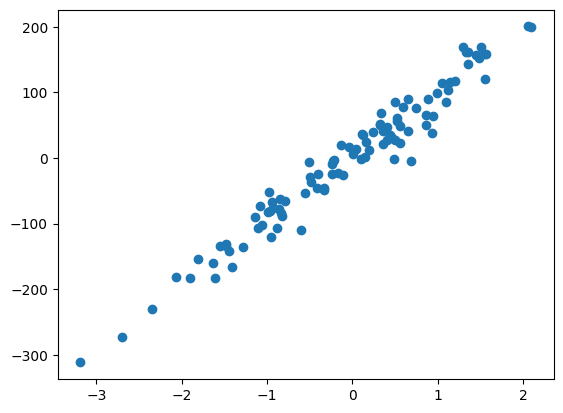

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=20)
plt.scatter(X, y)

## Applying Sklear regression on this data

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X, y)

LinearRegression()

In [7]:
print(lr.coef_)

[96.23791062]


In [8]:
lr.intercept_

2.2912972569160335

In [9]:
m = 96.23 ## my coef

## To create my Custom Regression Class using GRadient Descent

In [ ]:
class GDRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.m = 96.23
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            # print(loss_slope, self.b)
        print(self.b)

In [29]:
gd = GDRegressor(0.001, 100)
gd.fit(X, y)

-24458.173182977254 -95.54182681702275
-19566.5385463818 -75.97528827064096
-15653.230837105442 -60.32205743353552
-12522.584669684355 -47.79947276385116
-10018.067735747483 -37.78140502810368
-8014.454188597986 -29.76695083950569
-6411.5633508783885 -23.3553874886273
-5129.250680702712 -18.22613680792459
-4103.400544562169 -14.122736263362421
-3282.720435649735 -10.840015827712687
-2626.1763485197885 -8.213839479192899
-2100.94107881583 -6.112898400377068
-1680.752863052665 -4.432145537324403
-1344.6022904421313 -3.0875432468822717
-1075.681832353705 -2.0118614145285667
-860.5454658829643 -1.1513159486456024
-688.4363727063715 -0.4628795759392309
-550.7490981650969 0.08786952222586608
-440.5992785320776 0.5284688007579437
-352.47942282566225 0.8809482235836059
-281.9835382605299 1.1629317618441357
-225.5868306084238 1.3885185924525596
-180.46946448673907 1.5689880569392987
-144.37557158939114 1.7133636285286897
-115.50045727151281 1.8288640858002025
-92.40036581721026 1.92126445161741

## Actual Custom GD class

In [30]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)


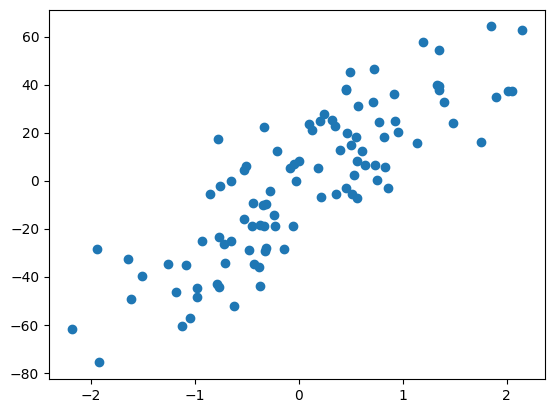

In [ ]:
plt.scatter(X,y)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


## Now build our actual custom GD class

In [37]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [38]:
gd = GDRegressor(0.001,50)

In [39]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [40]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579